In [1]:
import matplotlib.pyplot as plt
import mysql.connector
import pandas as pd
from sklearn import datasets

df = pd.read_excel("OCD Patient Dataset_ Demographics & Clinical Data.xlsx")
df.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,42566,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,42853,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,43133,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,41876,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,44612,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


In [2]:
# Show the number of rows and columns
print("Rows, Columns:", df.shape)


Rows, Columns: (1500, 17)


In [3]:
#Columns name
print(df.columns)  

Index(['Patient ID', 'Age', 'Gender', 'Ethnicity', 'Marital Status',
       'Education Level', 'OCD Diagnosis Date',
       'Duration of Symptoms (months)', 'Previous Diagnoses',
       'Family History of OCD', 'Obsession Type', 'Compulsion Type',
       'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)',
       'Depression Diagnosis', 'Anxiety Diagnosis', 'Medications'],
      dtype='object')


In [4]:
#Information about dataframe
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   int64 
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1252 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 13  Y-B

In [5]:
#numeric statistics
print(df.describe()) 

        Patient ID          Age  OCD Diagnosis Date  \
count  1500.000000  1500.000000         1500.000000   
mean   5541.254000    46.781333        43231.106667   
std    2562.389469    16.830321          918.968649   
min    1017.000000    18.000000        41591.000000   
25%    3338.000000    32.000000        42445.000000   
50%    5539.500000    47.000000        43231.000000   
75%    7745.500000    61.000000        44000.500000   
max    9995.000000    75.000000        44874.000000   

       Duration of Symptoms (months)  Y-BOCS Score (Obsessions)  \
count                    1500.000000                1500.000000   
mean                      121.745333                  20.048000   
std                        67.404610                  11.823884   
min                         6.000000                   0.000000   
25%                        64.000000                  10.000000   
50%                       121.000000                  20.000000   
75%                       178.00000

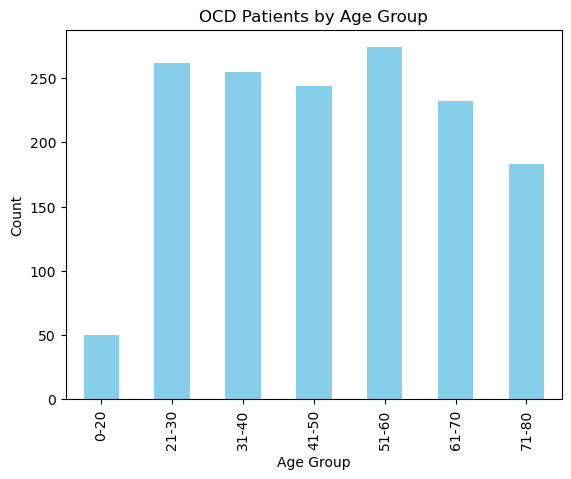

In [6]:

bins = [0, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-20','21-30','31-40','41-50','51-60','61-70','71-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count per AgeGroup
agegroup_counts = df['AgeGroup'].value_counts().sort_index()

# Plot
agegroup_counts.plot(kind='bar', color='skyblue')
plt.title("OCD Patients by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()


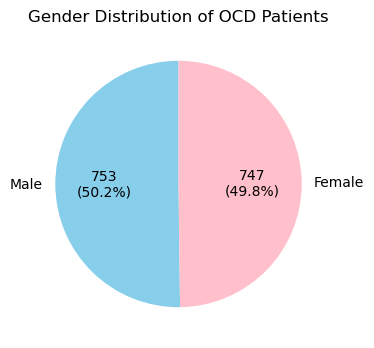

In [7]:
#Gender Distribution
gender_counts = df['Gender'].value_counts()
colors = ['skyblue', 'pink']

#Function to show count of male and female
def show_count_pct(pct, allvals):
    total = sum(allvals)
    count = int(round(pct/100.*total))
    return f"{count}\n({pct:.1f}%)"

# Simple Pie Chart
plt.figure(figsize=(4,4))
plt.pie(
    gender_counts,
    labels=gender_counts.index,   # Male / Female
    autopct=lambda pct: show_count_pct(pct, gender_counts),         # Show percentage only
    colors=colors,
    startangle=90
)
plt.title("Gender Distribution of OCD Patients")
plt.show()

In [8]:
ethnicity_counts = df['Ethnicity'].value_counts()
print(ethnicity_counts)  # show counts 


Ethnicity
Caucasian    398
Hispanic     392
Asian        386
African      324
Name: count, dtype: int64


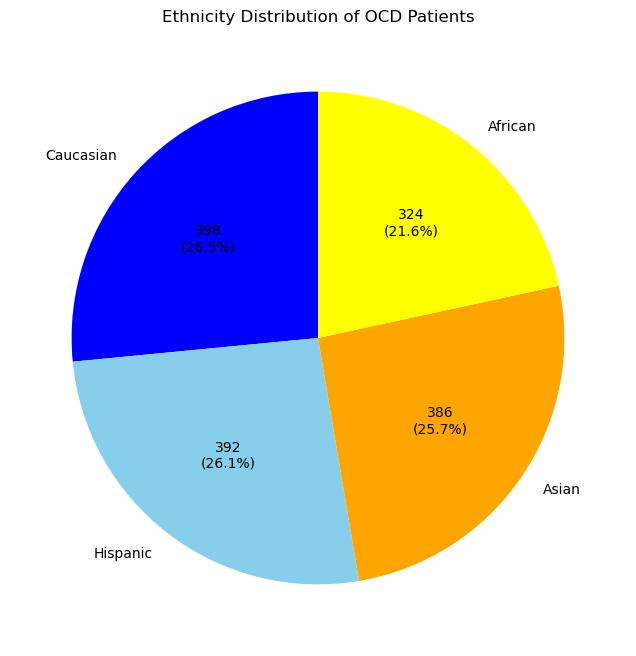

In [9]:
ethnicity_counts=df['Ethnicity'].value_counts()
colors=["blue","skyblue","orange","yellow"]

def show_count_pct(pct, allvals):
    total = sum(allvals)
    count = int(round(pct/100.*total))
    return f"{count}\n({pct:.1f}%)"

plt.figure(figsize=(8,8))
plt.pie(
    ethnicity_counts,
    labels=ethnicity_counts.index,
    autopct=lambda pct: show_count_pct(pct, ethnicity_counts),
    colors=colors,
    startangle=90
)


plt.title("Ethnicity Distribution of OCD Patients")
plt.show()


In [10]:
df['OCD Diagnosis Date'] = pd.to_datetime(df['OCD Diagnosis Date'], errors='coerce')

# Check for missing / invalid dates
print(df['OCD Diagnosis Date'].isnull().sum())

0


In [11]:
comp_counts = df['Compulsion Type'].value_counts()
print(comp_counts)


Compulsion Type
Washing     321
Counting    316
Checking    292
Praying     286
Ordering    285
Name: count, dtype: int64


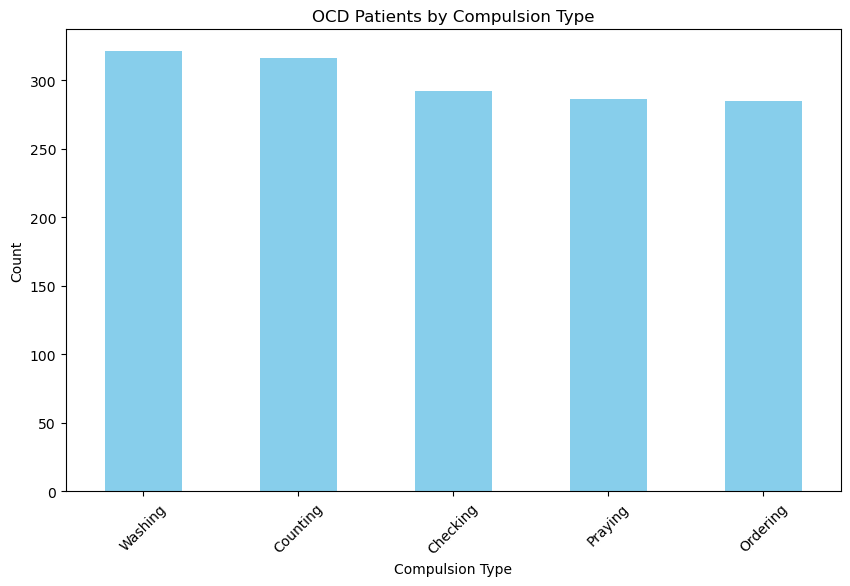

In [12]:
#Compulsion Counts
comp_counts = df['Compulsion Type'].value_counts()
plt.figure(figsize=(10,6))
comp_counts.plot(kind='bar', color='skyblue')
plt.title("OCD Patients by Compulsion Type")
plt.xlabel("Compulsion Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [13]:
df['Diagnosis_Date'] = pd.to_datetime(df['OCD Diagnosis Date'], errors='coerce')
df['Diagnosis_Month'] = df['OCD Diagnosis Date'].dt.to_period('M')

# Count by month
count_by_month = df['Diagnosis_Month'].value_counts().sort_index()
print(count_by_month)


Diagnosis_Month
1970-01    1500
Freq: M, Name: count, dtype: int64


In [14]:
df.sort_values(by="Gender").head(20)


,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications,AgeGroup,Diagnosis_Date,Diagnosis_Month
0,1018,32,Female,African,Single,Some College,1970-01-01 00:00:00.000042566,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI,31-40,1970-01-01 00:00:00.000042566,1970-01
595,4862,62,Female,Hispanic,Divorced,Some College,1970-01-01 00:00:00.000042338,75,GAD,No,Hoarding,Checking,11,12,Yes,Yes,NaN,61-70,1970-01-01 00:00:00.000042338,1970-01
596,1815,31,Female,Asian,Single,Some College,1970-01-01 00:00:00.000042305,230,NaN,Yes,Religious,Counting,16,22,Yes,No,Benzodiazepine,31-40,1970-01-01 00:00:00.000042305,1970-01
597,3994,29,Female,Asian,Single,Graduate Degree,1970-01-01 00:00:00.000043928,59,MDD,Yes,Harm-related,Counting,15,17,No,Yes,NaN,21-30,1970-01-01 00:00:00.000043928,1970-01
1204,8406,33,Female,African,Single,Some College,1970-01-01 00:00:00.000042790,231,Panic Disorder,Yes,Contamination,Counting,23,29,No,Yes,SNRI,31-40,1970-01-01 00:00:00.000042790,1970-01
1203,5759,57,Female,African,Married,Some College,1970-01-01 00:00:00.000042460,75,PTSD,Yes,Contamination,Washing,6,23,Yes,No,Benzodiazepine,51-60,1970-01-01 00:00:00.000042460,1970-01
601,2255,25,Female,African,Divorced,College Degree,1970-01-01 00:00:00.000044203,76,GAD,No,Symmetry,Ordering,17,3,Yes,No,NaN,21-30,1970-01-01 00:00:00.000044203,1970-01
1202,8885,41,Female,Asian,Married,Some College,1970-01-01 00:00:00.000043207,74,Panic Disorder,No,Hoarding,Checking,39,36,Yes,No,SNRI,41-50,1970-01-01 00:00:00.000043207,1970-01
603,5772,66,Female,Hispanic,Married,Graduate Degree,1970-01-01 00:00:00.000043296,169,GAD,No,Symmetry,Washing,27,1,No,No,NaN,61-70,1970-01-01 00:00:00.000043296,1970-01
1201,5272,55,Female,Hispanic,Single,High School,1970-01-01 00:00:00.000044505,218,GAD,Yes,Symmetry,Ordering,20,19,No,Yes,SNRI,51-60,1970-01-01 00:00:00.000044505,1970-01


In [15]:
df['Gender'].value_counts()

Gender
Male      753
Female    747
Name: count, dtype: int64

In [16]:
ethnicity_counts=df['Ethnicity'].value_counts()
print(ethnicity_counts)

Ethnicity
Caucasian    398
Hispanic     392
Asian        386
African      324
Name: count, dtype: int64


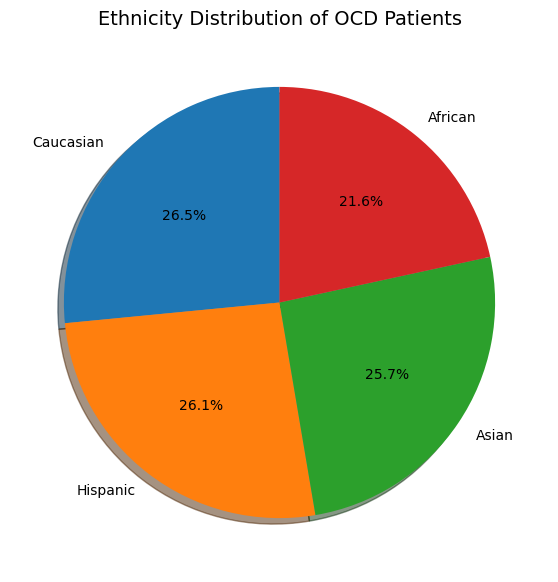

In [17]:
plt.figure(figsize=(7,7))
plt.pie(
    ethnicity_counts.values,
    labels=ethnicity_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True
)
plt.title("Ethnicity Distribution of OCD Patients", fontsize=14)
plt.show()

In [18]:
print(df['Medications'].value_counts())

Medications
Benzodiazepine    386
SNRI              376
SSRI              352
Name: count, dtype: int64


In [19]:
print(df['Obsession Type'].value_counts())

Obsession Type
Harm-related     333
Contamination    306
Religious        303
Symmetry         280
Hoarding         278
Name: count, dtype: int64


In [33]:
# Group by Gender and sum the Compulsion scores
Ycompulsion_sum = df.groupby('Gender')['Y-BOCS Score (Compulsions)'].sum()
print(Ycompulsion_sum)


Gender
Female    14639
Male      14800
Name: Y-BOCS Score (Compulsions), dtype: int64


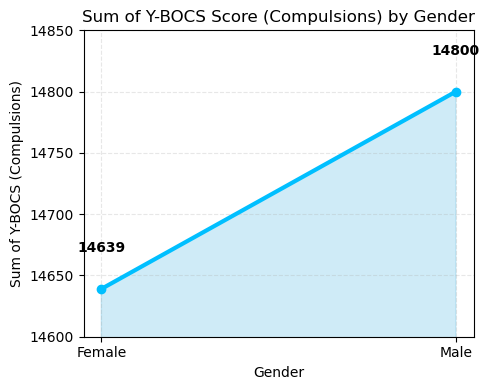

In [50]:

#  Plot
plt.figure(figsize=(5,4))
plt.plot(
    Ycompulsion_sum.index,
    Ycompulsion_sum.values,
    marker='o',
    color='deepskyblue',
    linewidth=3
)
plt.fill_between(Ycompulsion_sum.index, Ycompulsion_sum.values, color='skyblue', alpha=0.4)

# Custom Y-axis range — start near 14900
plt.ylim(14600, 14850)
plt.yticks([14600, 14650, 14700, 14750, 14800, 14850])
for x, y in zip(Ycompulsion_sum.index, Ycompulsion_sum.values):
    plt.text(x, y + 30, f"{y}", ha='center', fontsize=10, fontweight="bold", color='black')

plt.title("Sum of Y-BOCS Score (Compulsions) by Gender")
plt.xlabel("Gender")
plt.ylabel("Sum of Y-BOCS (Compulsions)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
print(compulsion_sum.values

In [38]:
Ob_compulsion_sum = df.groupby('Gender')['Y-BOCS Score (Obsessions)'].sum()
print(Ob_compulsion_sum)


Gender
Female    15086
Male      14986
Name: Y-BOCS Score (Obsessions), dtype: int64


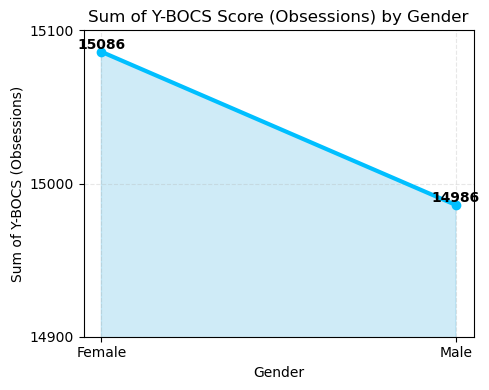

In [48]:
#  Plot
plt.figure(figsize=(5,4))
plt.plot(
    Ob_compulsion_sum.index,
    Ob_compulsion_sum.values,
    marker='o',
    color='deepskyblue',
    linewidth=3
)
plt.fill_between(Ob_compulsion_sum.index, Ob_compulsion_sum.values, color='skyblue', alpha=0.4)

# Custom Y-axis range — start near 14900
plt.ylim(14900, 15100)
plt.yticks([14900, 15000, 15100 ])
for x, y in zip(Ob_compulsion_sum.index, Ob_compulsion_sum.values):
    plt.text(x, y + 2, f"{y}", ha='center', fontsize=10, fontweight='bold', color='black')

plt.title("Sum of Y-BOCS Score (Obsessions) by Gender")
plt.xlabel("Gender")
plt.ylabel("Sum of Y-BOCS (Obsessions)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [54]:
df['OCD Diagnosis Date'] = pd.to_datetime(df['OCD Diagnosis Date'], errors='coerce', dayfirst=True)
df['Diagnosis_Year'] = df['OCD Diagnosis Date'].dt.year
patients_by_year = df['Diagnosis_Year'].value_counts().sort_index()
print(patients_by_year)


Diagnosis_Year
1970    1500
Name: count, dtype: int64


In [59]:
df['numeric_date'] = df['OCD Diagnosis Date'].astype('int64') / 1e9 / 86400
# Explanation: converts nanoseconds → seconds → days

# Step 2: Now convert those numeric day counts into real Excel-style dates
df['OCD Diagnosis Date'] = pd.to_datetime(df['numeric_date'], unit='d', origin='1899-12-30')

# Step 3: Extract Year
df['Diagnosis_Year'] = df['OCD Diagnosis Date'].dt.year

# Step 4: Count Patients by Year
patients_by_year = df['Diagnosis_Year'].value_counts().sort_index()
print(patients_by_year)



Diagnosis_Year
1899    1500
Name: count, dtype: int64
